In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.ticker as ticker

# Data

## Normal Diode

In [3]:
diode_forwards_v = np.array([3.1,
157,
239.3,
337.8,
414.5,
472.2,
509.4,
533,
548.3,
562.6,
570.5,
580.9,
587.5,
594.8,
598,
604,
609,
614,
618,
622,
626,
630,
633,
636,
650,
664,
659,
670,
677,
684,
689,
696,
701,
709,
707,
712,
719,
727,
737,])
diode_backwards_v = np.array([
-0.9,
-115.4,
-550.9,
-1043,
-1543,
-2056,
-2556,
-3082,
-3575,
-4080,
-4591,
-5045,
-5555,
-6090,
-6570,
-7110,
-7560,
-8120,
-9120,
-10120,
-12150,
-14110,
-16140,
-18160,
-20150,
])
diode_forwards_j = np.array([
0,
0,
0,
0,
0.01,
0.05,
0.12,
0.2,
0.27,
0.37,
0.44,
0.54,
0.61,
0.71,
0.8,
0.88,
0.98,
1.08,
1.18,
1.25,
1.36,
1.47,
1.55,
1.65,
2.17,
2.77,
2.53,
3.1,
3.54,
3.95,
4.32,
4.88,
5.33,
6.1,
5.9,
6.41,
7.18,
8.12,
9.14,])
diode_backwards_j = np.array([
0,
0,
0,
-0.0001,
-0.0001,
-0.0001,
-0.0002,
-0.0003,
-0.0003,
-0.0003,
-0.0004,
-0.0004,
-0.0005,
-0.0006,
-0.0006,
-0.0007,
-0.0007,
-0.0008,
-0.0009,
-0.001,
-0.0012,
-0.0014,
-0.0016,
-0.0017,
-0.0019,
])

## Zener Diode

In [4]:
zener_forwards_v = np.array([5,
99.8,
250,
297.3,
393.5,
477.8,
563.4,
623,
650,
662,
675,
683,
689,
693,
698,
701,
705,
708,
711,
714,
717,
719,
722,
723,
724,
726,
728,
730,
731,
732,
734,
740,
745,
749,
753,
756,
759,
765,
769,
773,
777,])
zener_backwards_v = np.array([-4.7,
-215.5,
-465.9,
-379.5,
-583,
-779,
-870,
-1058,
-1209,
-1342,
-1512,
-1656,
-1823,
-1922,
-2129,
-2210,
-2294,
-2369,
-2423,
-2441,
-2475,
-2515,
-2543,
-2570,
-2590,
-2616,
-2641,
-2666,
-2680,
-2696,
-2728,
-2746,
-2765,
-2782,
-2796,
-2813,
-2885,
-2924,
-2996,
-3093,
-3218,
-3287,
-3341,
-3396,
-3443,
-3481,
-3518,
-3554,
-3585,
-3611,
-3637,
-3663,
-3687,
])
zener_forwards_j = np.array([
    0,
0,
0,
0,
0,
0,
0.01,
0.06,
0.14,
0.21,
0.32,
0.41,
0.5,
0.58,
0.67,
0.75,
0.86,
0.94,
1.04,
1.15,
1.25,
1.34,
1.49,
1.54,
1.62,
1.73,
1.83,
1.94,
2.03,
2.12,
2.23,
2.78,
3.18,
3.72,
4.18,
4.67,
5.17,
6.2,
7.13,
8.17,
9.11,])
zener_backwards_j = np.array([0,
0,
0,
0,
0,
-0.0001,
-0.0001,
-0.0005,
-0.0015,
-0.0035,
-0.0092,
-0.0194,
-0.0431,
-0.0671,
-0.157,
-0.215,
-0.307,
-0.384,
-0.459,
-0.487,
-0.545,
-0.622,
-0.682,
-0.744,
-0.794,
-0.861,
-0.93,
-1.002,
-1.055,
-1.14,
-1.216,
-1.282,
-1.357,
-1.427,
-1.488,
-1.565,
-1.928,
-2.274,
-2.628,
-3.43,
-4.73,
-5.67,
-6.57,
-7.54,
-8.52,
-9.45,
-10.44,
-11.45,
-12.42,
-13.42,
-14.4,
-15.46,
-16.51,

])

# Plotting IV Characterstics

## Normal Diode

In [5]:
def Id(Vd, Is, V_min):
#     Vd = np.float128
#     Vd = Vd.astype(np.float128)
    return Is*(np.exp((Vd-V_min)/(2*0.026)))

popt, pcov = curve_fit(Id, diode_forwards_v, diode_forwards_j, p0=[6, 0.7])

popt

C:\Users\user\AppData\Local\Temp\ipykernel_17920\729495391.py:4: RuntimeWarning: overflow encountered in exp
  return Is*(np.exp((Vd-V_min)/(2*0.026)))


array([6. , 0.7])

Text(0, 0.5, 'Current through the diode ($I_D$) in $mA$')

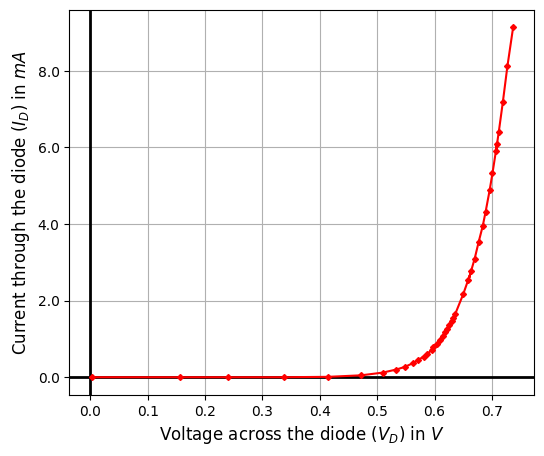

In [28]:
def two_scales_current(value, position):
    if value >= 0:
        return f'{value}'
    else:
        return f'{value}'
    
def two_scales_voltage(value, position):
    if value >= 0:
        return f'{round(value, 1)}'
    else:
        return f'{round(value, 1)*100}'
    
# formatter = 
figure, ax = plt.subplots(figsize=(6, 5))

# ax.set_xlim(-.22, 0.8)
# ax.set_ylim(-0.3, np.max(diode_forwards_j)+1)
ax.axvline(linewidth=2, color='black')
ax.axhline(linewidth=2, color='black')
ax.plot(diode_forwards_v/1000, diode_forwards_j, color='red', marker='D', linestyle='-', ms=3)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(two_scales_voltage))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(two_scales_current))

# ax.grid(visible=True, which='minor',color='r', linestyle='--')
ax.grid()
ax.set_xlabel(r'Voltage across the diode ($V_D$) in $V$', fontsize=12)
ax.set_ylabel(r'Current through the diode ($I_D$) in $mA$', fontsize=12)

# compute scale for reverse and forward region

# ax.show()
# a = np.array([41450.        ,  9444.        ,  4245.        ,  2665.        ,
#         2030.74074074,  1520.54054054,  1296.59090909,  1075.74074074,
#          963.1147541 ,   837.74647887,   747.5       ,   686.36363636,
#          621.42857143,   568.51851852,   523.72881356,   497.6       ,
#          460.29411765,   428.57142857,   408.38709677,   385.45454545,
#          299.53917051,   239.71119134,   260.4743083 ,   216.12903226,
#          191.24293785,   173.16455696,   159.49074074,   142.62295082,
#          131.51969981,   116.2295082 ,   119.83050847,   111.07644306,
#          100.13927577,    89.5320197 ,    80.6345733 ])
# ax.plot((diode_forwards_v/1000)[4:], a, color='red', marker='D', linestyle='-', ms=3)

Text(0, 0.5, 'Current through the diode ($I_D$) in $\\mu A$')

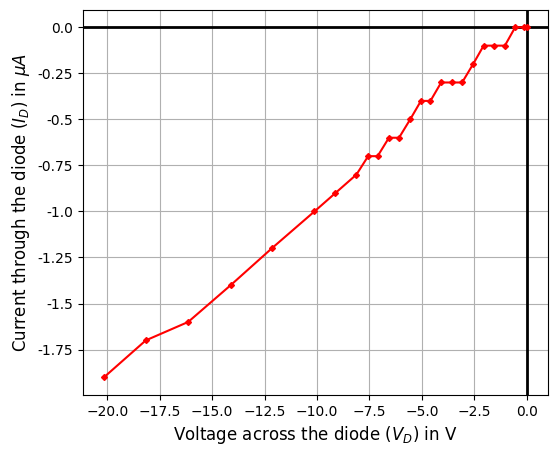

In [29]:
def two_scales_current(value, position):
    if value >= 0:
        return f'{value}'
    else:
        return f'{value}'
    
def two_scales_voltage(value, position):
    if value >= 0:
        return f'{round(value, 1)}'
    else:
        return f'{round(value, 1)}'
    
# formatter = 
figure, ax = plt.subplots(figsize=(6, 5))

# ax.set_xlim(-.22, 0.8)
# ax.set_ylim(-0.3, np.max(diode_forwards_j)+1)
ax.axvline(linewidth=2, color='black')
ax.axhline(linewidth=2, color='black')
# ax.plot(diode_forwards_v/1000, diode_forwards_j, color='red', marker='D', linestyle='-', ms=3)
ax.plot(diode_backwards_v/1000, diode_backwards_j*1000, color='red', marker='D', linestyle='-', ms=3)

# ax.xaxis.set_major_formatter(ticker.FuncFormatter(two_scales_voltage))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(two_scales_current))


ax.grid()
ax.set_xlabel(r'Voltage across the diode ($V_D$) in V', fontsize=12)
ax.set_ylabel(r'Current through the diode ($I_D$) in $\mu A$', fontsize=12)

# compute scale for reverse and forward region

# ax.show()

## Zener Diode

Text(0, 0.5, 'Current through the diode ($I_D$) in $mA$')

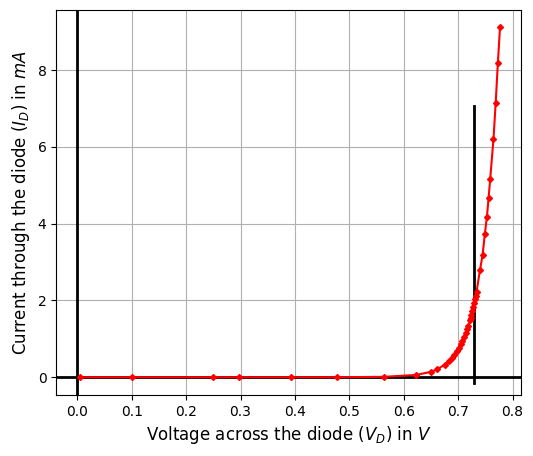

In [46]:
# def two_scales_current(value, position):
#     if value >= 0:
#         return f'{value} mA'
#     else:
#         return f'{value} nA'
    
# def two_scales_voltage(value, position):
#     if value >= 0:
#         return f'{round(value, 1)} mV'
#     else:
#         return f'{round(value, 1)*100} V'
    
figure, ax = plt.subplots(figsize=(6, 5))

# ax.set_xlim(-.4, .1)
# ax.set_ylim(-0.3, np.max(diode_forwards_j)+1)

ax.axvline(linewidth=2, color='black')
# ax.axvline(x=.73, ymin=0.05-0.02, ymax=0.75, linewidth=2, color='black')
ax.axhline(linewidth=2, color='black')
ax.plot(zener_forwards_v/1000, zener_forwards_j, color='red', marker='D', linestyle='-', ms=3)
# ax.plot(zener_backwards_v/1000, zener_backwards_j, color='red', marker='D', linestyle='-', ms=3)

# ax.xaxis.set_major_formatter(ticker.FuncFormatter(two_scales_voltage))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(two_scales_current))
# ax.plt([0, 29])
ax.grid()
ax.set_xlabel(r'Voltage across the diode ($V_D$) in $V$', fontsize=12)
ax.set_ylabel(r'Current through the diode ($I_D$) in $mA$', fontsize=12)

# compute scale for reverse and forward region

# ax.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17920\3626793932.py:33: RuntimeWarning: divide by zero encountered in divide
  vdif/idif


array([          -inf,           -inf,            inf,           -inf,
       1.96000000e+03,           -inf, 4.70000000e+02, 1.51000000e+02,
       6.65000000e+01, 2.98245614e+01, 1.41176471e+01, 7.04641350e+00,
       4.12500000e+00, 2.30255840e+00, 1.39655172e+00, 9.13043478e-01,
       9.74025974e-01, 7.20000000e-01, 6.42857143e-01, 5.86206897e-01,
       5.19480519e-01, 4.66666667e-01, 4.35483871e-01, 4.00000000e-01,
       3.88059701e-01, 3.62318841e-01, 3.47222222e-01, 2.64150943e-01,
       1.88235294e-01, 4.21052632e-01, 2.72727273e-01, 2.53333333e-01,
       2.42857143e-01, 2.29508197e-01, 2.20779221e-01, 1.98347107e-01,
       1.12716763e-01, 2.03389831e-01, 1.20947631e-01, 9.61538462e-02,
       7.34042553e-02, 6.00000000e-02, 5.67010309e-02, 4.79591837e-02,
       4.08602151e-02, 3.73737374e-02, 3.56435644e-02, 3.19587629e-02,
       2.60000000e-02, 2.65306122e-02, 2.45283019e-02, 2.28571429e-02])

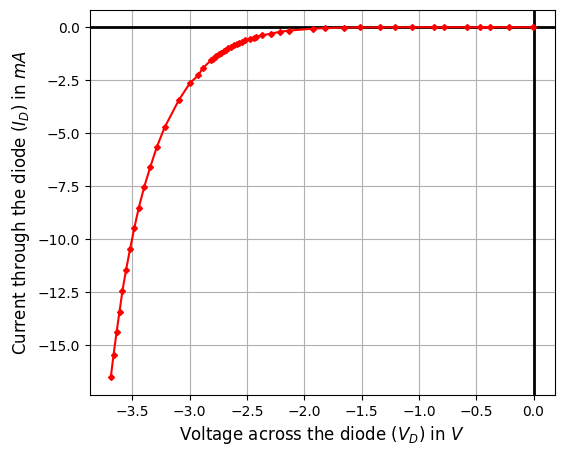

In [49]:
# def two_scales_current(value, position):
#     if value >= 0:
#         return f'{value} mA'
#     else:
#         return f'{value} nA'
    
# def two_scales_voltage(value, position):
#     if value >= 0:
#         return f'{round(value, 1)} mV'
#     else:
#         return f'{round(value, 1)*100} V'
    
figure, ax = plt.subplots(figsize=(6, 5))

# ax.set_xlim(-.4, .1)
# ax.set_ylim(-0.3, np.max(diode_forwards_j)+1)
ax.axvline(linewidth=2, color='black')
ax.axhline(linewidth=2, color='black')
# ax.plot(zener_forwards_v/1000, zener_forwards_j, color='red', marker='D', linestyle='-', ms=3)
ax.plot(zener_backwards_v/1000, zener_backwards_j, color='red', marker='D', linestyle='-', ms=3)

# ax.xaxis.set_major_formatter(ticker.FuncFormatter(two_scales_voltage))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(two_scales_current))


ax.grid()
ax.set_xlabel(r'Voltage across the diode ($V_D$) in $V$', fontsize=12)
ax.set_ylabel(r'Current through the diode ($I_D$) in $mA$', fontsize=12)

# compute scale for reverse and forward region
idif = np.diff(zener_backwards_j)
vdif = np.diff(zener_backwards_v/1000)
vdif/idif
# ax.show()